# これは何？

箱庭ドローンシミュレータの物理モデルを分析して、PIDパラメータを検討します。

- プラントモデル
  - 高度の運動方程式
- コントローラ
  - PID制御


# 環境のインストール

In [1]:
!git clone --recursive https://github.com/toppers/hakoniwa-drone-education
%cd hakoniwa-drone-education

Cloning into 'hakoniwa-drone-education'...
remote: Enumerating objects: 409, done.
remote: Counting objects: 100% (36/36), done.
remote: Compressing objects: 100% (30/30), done.
remote: Total 409 (delta 7), reused 24 (delta 5), pack-reused 373 (from 1)
Receiving objects: 100% (409/409), 184.90 KiB | 4.62 MiB/s, done.
Resolving deltas: 100% (185/185), done.
/content/hakoniwa-drone-education


# Pythonライブラリのインストール

In [2]:
!pip install -r requirements.txt

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 46.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 549.6/549.6 kB 25.2 MB/s eta 0:00:00
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.7.1
    Uninstalling matplotlib-3.7.1:
      Successfully uninstalled matplotlib-3.7.1


# PIDパラメータと展開

高度制御および高度速度制御のPIDパラメータは、`/content/hakoniwa-drone-education/models/constants/constants.json`で定義されています。

## 高度制御
- Alt_Kp
- Alt_Ki
- Alt_Kd

## 高度速度制御
- VAlt_Kp
- VAlt_Ki
- VAlt_Kd


# 高度速度制御のモデルファイルを生成します

In [4]:
!python src/libs/exmapnd_json.py models/spd_alt_control.json ./spd_out.json

展開後のJSONファイルを ./spd_out.json に保存しました


# 高度速度制御のボード線図を見てみよう

num:  [1.0, 1.0, 0.0]
den:  [0.013703, 0.710965, 0.05, 0.0]
/usr/local/lib/python3.10/dist-packages/control/freqplot.py:435: FutureWarning: bode_plot() return value of mag, phase, omega is deprecated; use frequency_response()
  warnings.warn(
ゲイン余裕 (Gain Margin): inf dB
位相余裕 (Phase Margin): 134.18818018908547 degrees
ゲイン余裕発生周波数: nan rad/s
位相余裕発生周波数: 51.40983275573387 rad/s


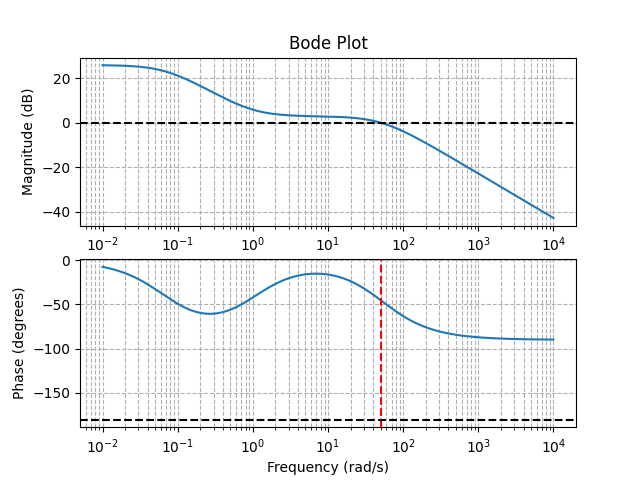

In [5]:
!python src/libs/analyze_model.py spd_out.json --mode bode ls
# 画像の表示
from IPython.display import Image
Image('bode_plot.png')

# 高度速度制御のステップ応答を見てみよう

num:  [1.0, 1.0, 0.0]
den:  [0.013703, 1.7109649999999998, 1.05, 0.0]
Overshoot: -4.76% at 25.00 seconds
Steady-State Value: 0.95
Steady-State Error: 0.05
Rise Time (10%-90%): 2.78 seconds
Delay Time (50%): 0.25 seconds
Settling Time (within ±5%): 25.00 seconds


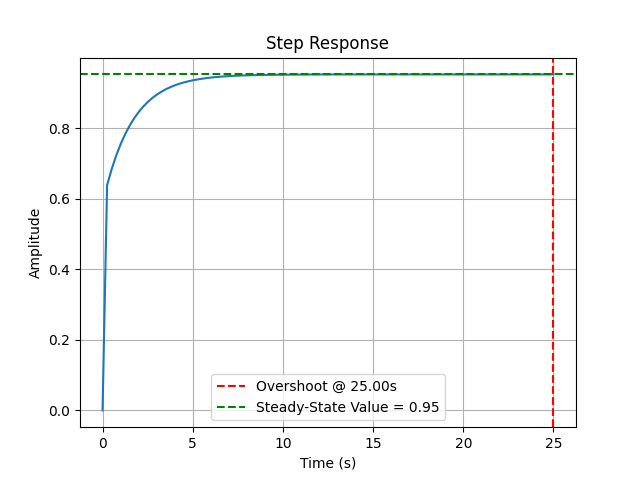

In [6]:
!python src/libs/analyze_model.py spd_out.json --mode step ws
# 画像の表示
from IPython.display import Image
Image('step_plot.png')

# 高度制御のモデルファイルを生成します

In [10]:
!python src/libs/exmapnd_json.py models/alt_control.json ./out.json

展開後のJSONファイルを ./out.json に保存しました


# 高度制御のボード線図を見てみよう

num:  [1.0, 2.0, 1.0, 0.0, 0.0]
den:  [0.013703, 0.710965, 0.05, 0.0, 0.0, 0.0]
/usr/local/lib/python3.10/dist-packages/control/freqplot.py:435: FutureWarning: bode_plot() return value of mag, phase, omega is deprecated; use frequency_response()
  warnings.warn(
ゲイン余裕 (Gain Margin): inf dB
位相余裕 (Phase Margin): 133.06374442425567 degrees
ゲイン余裕発生周波数: nan rad/s
位相余裕発生周波数: 51.4294041207291 rad/s


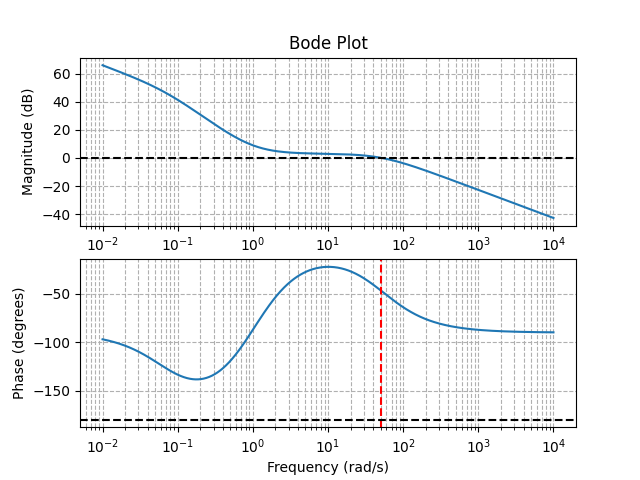

In [11]:
!python src/libs/analyze_model.py out.json --mode bode ls
# 画像の表示
from IPython.display import Image
Image('bode_plot.png')

# 高度制御のステップ応答を見てみよう

num:  [1.0, 2.0, 1.0, 0.0, 0.0]
den:  [0.013703, 1.7109649999999998, 2.05, 1.0, 0.0, 0.0]
Overshoot: 6.64% at 2.97 seconds
Steady-State Value: 1.00
Steady-State Error: -0.00
Rise Time (10%-90%): 0.69 seconds
Delay Time (50%): 0.23 seconds
Settling Time (within ±5%): 57.32 seconds


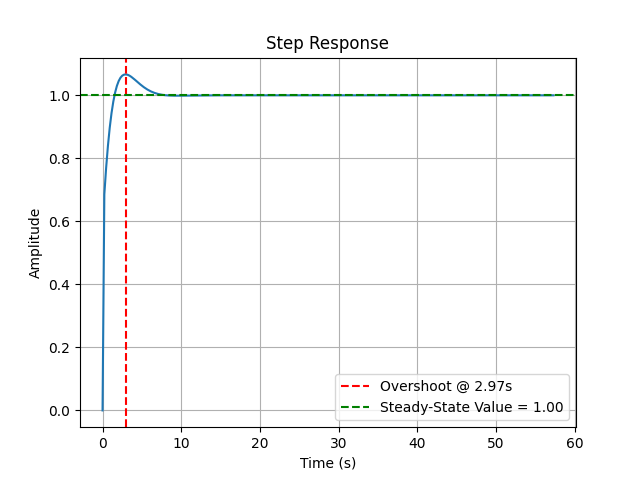

In [12]:
!python src/libs/analyze_model.py out.json --mode step ws
# 画像の表示
from IPython.display import Image
Image('step_plot.png')